In [20]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import requests
from pprint import pprint
from datetime import datetime
import os
import csv
from pathlib import Path

In [21]:
fire_data_23 = Path("outputs/fire_source_2023.csv")
fire_data_22 = Path("outputs/fire_source_2022.csv")
fire_data_21 = Path("outputs/fire_source_2021.csv")
fire_data_20 = Path("outputs/fire_source_2020.csv")
fire_data_19 = Path("outputs/fire_source_2019.csv")
fire_data_17 = Path("outputs/fire_source_2017.csv")
fire_data_15 = Path("outputs/fire_source_2015.csv")
fire_data_13 = Path("outputs/fire_source_2013.csv")

In [22]:
fire_2023_df = pd.read_csv(fire_data_23, encoding="ISO-8859-1")
fire_2022_df = pd.read_csv(fire_data_22, encoding="ISO-8859-1")
fire_2021_df = pd.read_csv(fire_data_21, encoding="ISO-8859-1")
fire_2020_df = pd.read_csv(fire_data_20, encoding="ISO-8859-1")
fire_2019_df = pd.read_csv(fire_data_19, encoding="ISO-8859-1")
fire_2017_df = pd.read_csv(fire_data_17, encoding="ISO-8859-1")
fire_2015_df = pd.read_csv(fire_data_15, encoding="ISO-8859-1")
fire_2013_df = pd.read_csv(fire_data_13, encoding="ISO-8859-1")
fire_2013_df

,Causes,Average Duration (days),Average GIS Acres,Number of Occurences (in the Year)
0,Lightning,26.00,997.18,56
1,Equipment Use,1.53,138.83,34
2,Smoking,1.00,232.97,6
3,Campfire,14.80,17662.81,15
4,Debris,1.50,133.87,8
5,Railroad,0.00,17.30,2
6,Arson,12.33,5197.43,9
7,Playing with fire,0.00,41.23,4
8,Vehicle,0.92,100.82,12
9,Powerline,1.79,66.13,14


In [25]:
merged_df = pd.concat([fire_2013_df, fire_2015_df], ignore_index=True)
summed_df = merged_df.groupby('Causes').sum().reset_index()

In [26]:
summed_df

,Causes,Average Duration (days),Average GIS Acres,Number of Occurences (in the Year)
0,Arson,18.83,5690.82,17
1,Campfire,17.42,19598.25,23
2,Debris,24.35,197.23,21
3,Equipment Use,3.39,625.83,62
4,Escaped Prescribed Burn,7.00,1012.83,6
5,Lightning,58.89,4870.98,165
6,Playing with fire,9.00,2011.99,7
7,Powerline,3.91,455.19,22
8,Railroad,0.00,17.30,2
9,Smoking,1.00,240.44,7


In [30]:
merged_df = pd.concat([summed_df, fire_2017_df], ignore_index=True)
merged_df = pd.concat([merged_df, fire_2019_df], ignore_index=True)
merged_df = pd.concat([merged_df, fire_2020_df], ignore_index=True)
merged_df = pd.concat([merged_df, fire_2021_df], ignore_index=True)
merged_df = pd.concat([merged_df, fire_2022_df], ignore_index=True)
merged_df = pd.concat([merged_df, fire_2023_df], ignore_index=True)
summed_df = merged_df.groupby('Causes').sum().reset_index()

In [31]:
summed_df

,Causes,Average Duration (days),Average GIS Acres,Number of Occurences (in the Year)
0,Aircraft,0.00,3.08,2
1,Arson,49.12,10849.06,164
2,Campfire,39.48,20556.82,81
3,Debris,40.21,2328.87,127
4,Equipment Use,38.03,3139.57,385
5,Escaped Prescribed Burn,14.04,1531.81,21
6,Lightning,285.75,75275.32,667
7,Playing with fire,13.12,2565.93,34
8,Powerline,29.59,66131.86,187
9,Railroad,4.00,261.42,5


In [40]:
summed_df.rename(columns={'Number of Occurences (in the Year)': 'Number of Occurences (Overall)'}, inplace=True)
summed_df.to_csv("outputs/fire_source_merged.csv",
                  encoding="utf-8", index=False, header=True)

In [34]:
man_duration = 0
man_GIS_acres = 0
man_oc = 0
nat_duration = 0
nat_GIS_acres = 0
nat_oc = 0
for index, row in summed_df.iterrows():
    if row['Causes'] == 'Lightning':
        nat_duration += row['Average Duration (days)']
        nat_GIS_acres += row['Average GIS Acres']
        nat_oc += row['Number of Occurences (Overall)']
    else:
        man_duration += row['Average Duration (days)'] 
        man_GIS_acres += row['Average GIS Acres']
        man_oc += row['Number of Occurences (Overall)']

man_vs_nature_df = pd.DataFrame({'Causes':['Man-Made', 'Natural'], 
                                 'Average Duration (days)': [man_duration, nat_duration], 
                                 'Average GIS Acres': [man_GIS_acres, nat_GIS_acres],
                                 'Number of Occurences (Overall)':[man_oc, nat_oc]
                                })
man_vs_nature_df

,Causes,Average Duration (days),Average GIS Acres,Number of Occurences (Overall)
0,Man-Made,290.80,118451.89,1330
1,Natural,285.75,75275.32,667


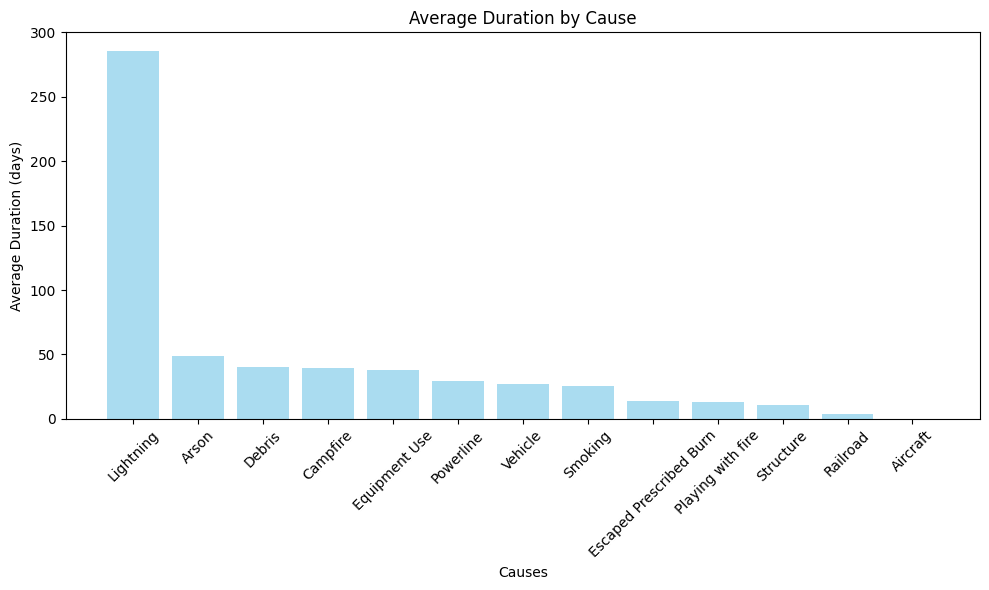

In [35]:
summed_df = summed_df.sort_values(by='Average Duration (days)', ascending=False)
plt.figure(figsize=(10, 6))

plt.bar(summed_df['Causes'], summed_df['Average Duration (days)'],
        color='skyblue', alpha=0.7)

plt.xlabel('Causes')
plt.ylabel('Average Duration (days)')
plt.title('Average Duration by Cause')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

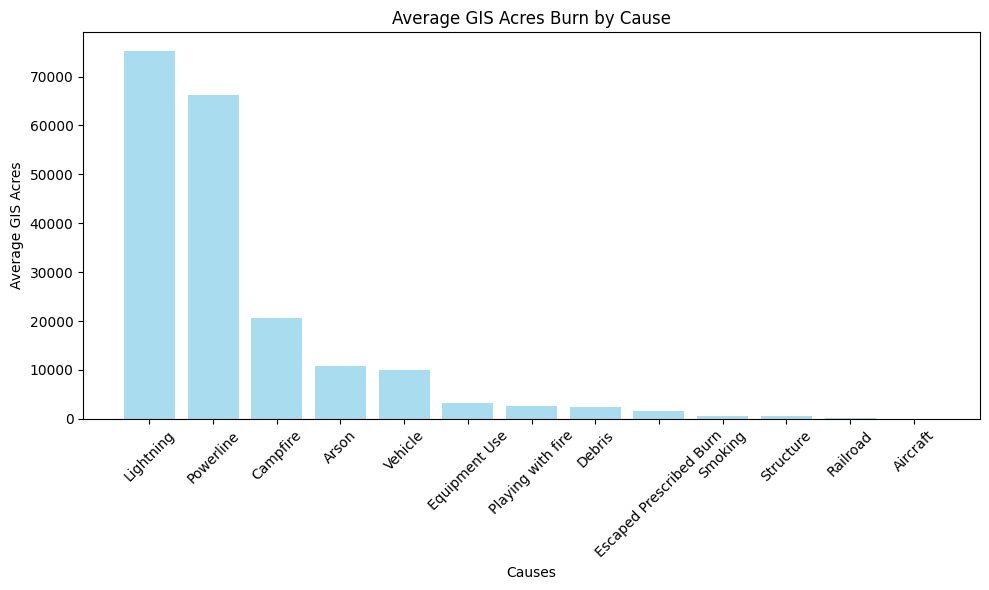

In [36]:
summed_df = summed_df.sort_values(by='Average GIS Acres', ascending=False)
plt.figure(figsize=(10, 6))

plt.bar(summed_df['Causes'], summed_df['Average GIS Acres'],
        color='skyblue', alpha=0.7)

plt.xlabel('Causes')
plt.ylabel('Average GIS Acres')
plt.title('Average GIS Acres Burn by Cause')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

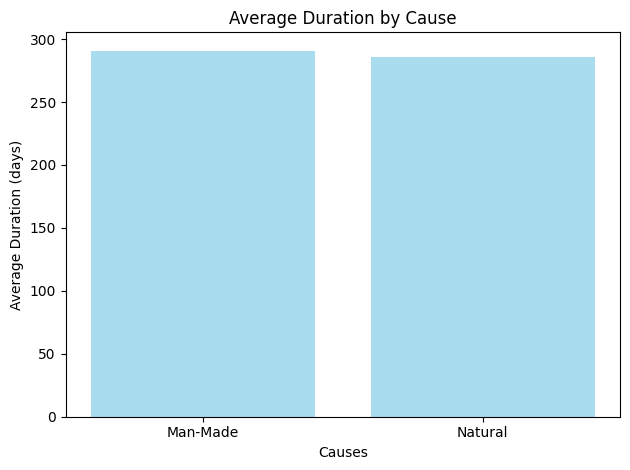

In [37]:
plt.bar(man_vs_nature_df['Causes'], man_vs_nature_df['Average Duration (days)'],
        color='skyblue', alpha=0.7)

plt.xlabel('Causes')
plt.ylabel('Average Duration (days)')
plt.title('Average Duration by Cause')

plt.tight_layout()
plt.show()

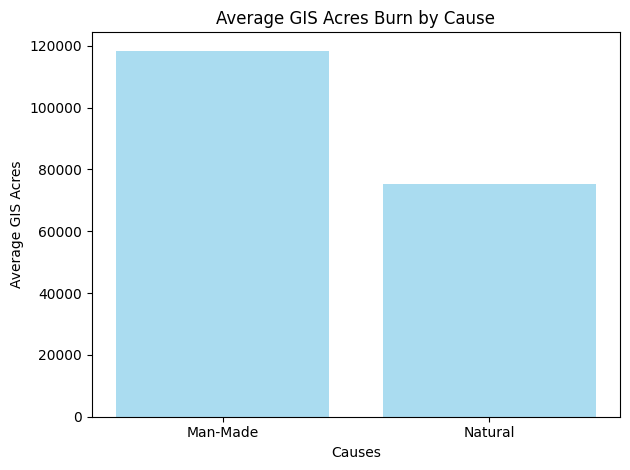

In [38]:
plt.bar(man_vs_nature_df['Causes'], man_vs_nature_df['Average GIS Acres'],
        color='skyblue', alpha=0.7)

plt.xlabel('Causes')
plt.ylabel('Average GIS Acres')
plt.title('Average GIS Acres Burn by Cause')

plt.tight_layout()
plt.show()

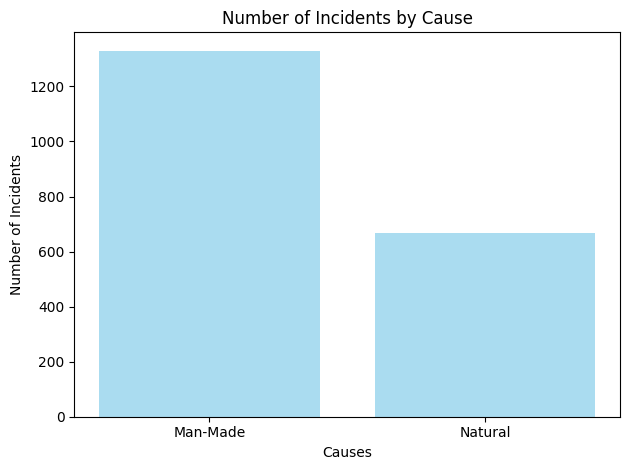

In [39]:
plt.bar(man_vs_nature_df['Causes'], man_vs_nature_df['Number of Occurences (Overall)'],
        color='skyblue', alpha=0.7)

plt.xlabel('Causes')
plt.ylabel('Number of Incidents')
plt.title('Number of Incidents by Cause')

plt.tight_layout()
plt.show()